# Comparing the principal axis theorem to PCA

## Introduction

Principal component analysis (PCA) is a popular unsupervised machine learning technique that determines orthogonal (and therefore uncorrelated) axes which can represent the data, usually in a lower dimensional space compared with the original features space.

On the other hand, the principal axis theorem states that for any ellipsoid (or hyperboloid), the principal axes which describe said shapes are orthogonal to each other.

On the outset, these appear to be rather different problems. PCA concerns itself with ascribing meaning to data (i.e.: what are the fundamental linear relationships between my features, or how can I compress my data?), the principal axis theorem is more about a description of the properties of surfaces.

However, having learnt both these ideas, it is clear that there is some inherint linkage between the two, namely because they both require the following steps:

1. A matrix representation of the 'information' (i.e.: equations, covariances)
2. An eigenvector decomposition of that information, which produces the principal axes/components and their realtive importances

This notebook contains some quick revision on the key topics (for my benefit), and observations of mine along the way.

## The Principal Axis Theorem (PAT)

### Rationale

As described above, any ellipsoid or hyperboloid has principal axes (the number of which is determined by the dimension of that surface) which are perpendicular to each other. Assuming there is a way we can extract these axes, the question still remains as to why we would want to do this.

There are a number of different fields to apply this. According to Wikipedia, one can use PAT in physics to study angular momentum. This is because when we have our axes aligned to the principal moment of inertia axes, it makes calculations concerning total angular momentum and rotational kinetic energy very easy. However if we don't have this alignment, we must therefore concern ourselves with finding the principal axes, and rotating our initial axes to align with these.

### 2D Ellipse Formula

With this in mind, a simple way to visualise this would be to construct an ellipse in 2D space which is not aligned with its major and minor axes and work from there.

The first question is therefore how to describe an ellipse with a matrix. Let us begin by writing the equation of an ellipse centered on the origin (note that we can generalise any ellipse to be centred as such with an easy translation of the axes):

$$ax_1^2 + bx_2^2 + cx_1x_2 = 1$$

At this point, let us consider a special case where the 'cross-term' ($x_1x_2$) has no co-efficient. This is equal to the sum of two squares:

$$ax_1^2 + bx_2^2 = 1$$

which is an ellipse which is aligned to the axes defined in the Cartesian space by $x_1$ and $x_2$. This is because when you consider the equation with the cross-term, when neither $x_1$ or $x_2$ are zero, we are adding a 'skew' term to our equation, thus causing a rotation of that point.

### Matrix Representation

Returning to the general ellipse equation (i.e.: with rotation); how can we write a matrix form of this? By writing our current axes as a vector of the form $
\mathbf{x} = \begin{bmatrix}
    x_1 \\ x_2
\end{bmatrix}
$ we can write the above equation out in the following manner:
$$
\begin{bmatrix}
    x_1 & x_2
\end{bmatrix}
\begin{bmatrix}
    a & c/2 \\
    c/2 & b
\end{bmatrix}
\begin{bmatrix}
    x_1 \\ x_2
\end{bmatrix}=1
$$

Therefore:
$$
ax_1^2 + bx_2^2 + cx_1x_2 = \mathbf{x}^T M \mathbf{x}
$$


(N.B.: The symmetric matrix $M$ is called the *matrix of the quadratic equation*)

### Why Eigendecomposition?

Let us return to the axis-aligned version of the ellipse equation. If we were to find the matrix of this quadratic equation we'd get:

$$
M = \begin{bmatrix}
    a & 0 \\
    0 & b
\end{bmatrix}
$$

Now we see the rationale for getting the eigenvectors, as through diagonalisation we write the original matrix in a form which is aligned to some rotated axes in the original dimensions. In this case, the eigenvalues would represent the coefficients of the axis aligned ellipse, and the eigenvectors the rotation required.

A way to think about it is as follows: The original ellipse equation with rotation can be converted to the ellipse equation without the rotation with a change of variables which eliminates the cross-term. The diagonalisation allows us to find this change of variables in the standard quadratic form with a simple representation as a matrix.

Let us return to the original matrix $M$ where $c/2$ is non-zero. We have this matrix, we understand the rationale behind diagonalising it, so let's proceed. Starting with the definition of an eigenvector, which is a vector which doesn't change direction when a transformation is applied to it.

$$ A\mathbf{v} = \lambda\mathbf{v}$$

where $A$ is the transformation. Therefore $\mathbf{v}$ is an eigenvector of $A$. To get to the idea of diagonalising, let us consider all the eigenvectors and eigenvalues of matrix $A$. This gives us a new matrix $V$ which comprises all the eigenvectors placed next to each other: $\begin{bmatrix}
    \mathbf{v_1} & \mathbf{v_2} & \cdots
\end{bmatrix}$. Now for the eigenvalues, we would have on the right hand side the following:

$$ \begin{bmatrix}
    \lambda_1\mathbf{v_1} & \lambda_2\mathbf{v_2} & \cdots
   \end{bmatrix}
$$

Now this is where the diagonalisation of the eigenvalues comes in, as we simply create a diagonal matrix with the eigenvalues as the values, which when written as below, would recover the previous RHS equations:

$$ \begin{bmatrix}
    \mathbf{v_1} & \mathbf{v_2} & \cdots
   \end{bmatrix}
   \begin{bmatrix}
    \lambda_1 & 0 & \cdots \\
    0 & \lambda_2 & \cdots \\
    \vdots & \vdots & \ddots \\
   \end{bmatrix} =
   V\Lambda $$

where $\Lambda$ is the diagonal eigenvalue matrix.

This leaves us with:

$$ AV = V\Lambda $$

Which leads to:

$$ A = V\Lambda V^{T} $$

since the matrix $V$ is orthogonal due to its orthonormal columns.

### Tying it all together

Having linked diagonalisation to an axis aligned ellipse, we now explicitely tie it together:

$$
ax_1^2 + bx_2^2 + cx_1x_2 = \mathbf{x}^TM\mathbf{x} = \mathbf{x}^T(V\Lambda V^{T})\mathbf{x} = (V^T \mathbf{x})^T \Lambda (V^T \mathbf{x}) = \mathbf{p}^T \Lambda \mathbf{p}
$$

This has the same form as the axis aligned ellipse, thus proving the idea that diagonalisation really does provide us with a way of rotating our axes to make the ellipse axis aligned.

### What about the eigenvalues?

As seen above, we end up with the diagonal matrix which comprised the eigenvalues. Having obtained the new principal axes (contained in the vector $\mathbf{p}$), it is very easy to understand the geometric significance of the eigenvalues.

Consider the 2D diagonal matrix:

$$ \begin{bmatrix}
    \lambda_1 & 0\\
    0 & \lambda_2\\
   \end{bmatrix}
$$

This allows us to write out a new ellipse equation with respect to the alligned axes:

$$
\lambda_1p_1^2 + \lambda_2p_2^2 = 1
$$

In the case when $p_1$ is set to zero, we get 
$p_2 = \pm 1/\sqrt{\lambda_2}$, and similarly when $p_2$ is set to zero, we get $p_1 = \pm 1/\sqrt{\lambda_1}$. Therefore, assuming that $\lambda_1 < \lambda_2$, it is observed that the corresponding eigenvector for the first eigenvalue must point in the direction of the major axis. This is somewhat counterintuitive, as one might expect the largest eigenvalue to correspond with the major axis, but this is clearly not the case!


## Principal Component Analysis (PCA)

### Theory

We can define PCA as finding the set of orthogonal axes that that maximises the variance of the data projected onto it.

Furthermore, if our data is of rank $D$, we can achieve a projection of this data onto a space rank $M$, where $M < D$.

Before we delve too deeply into finding these axes, let's remind ourselves of the covariance matrix.

### Covariance Matrix

The idea of covariance is of course related to variance itself. This is best illustrated by observing the following verbose equation for variance:

$$
var(\mathbf{x}) = \frac{\sum_{i=1}^n(x_i - \bar{x})(x_i - \bar{x})}{n-1}
$$

By changing the second bracketed term to another variable in our data, we get the following:

$$
cov(\mathbf{x},\mathbf{y}) = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{n-1}
$$

So what this means is that since we are taking the product of the respective differencecs of 'i'th terms for both variables, we can evaluate how they vary with respect to each other. Let us assume that the first bracketed term for 'i'th term is large and positive (i.e.: we are far away from the mean of $x$) and so is the second bracketed term. This results in a large product, which means that if this happens often in our data, the final covariance will be large and positive. Conversely, if the relative magnitudes are similar, but the signs are the opposite, we can see that the final covariance will also be large, but be negative.

Finally, consider two features with low covariance. What this means is that on average, when the first bracket was large, the second one was just as likely to be either positively or negatively large or small, resulting in no effect of the former on the latter.

N.B.: Covariance is closely related to correlation, and the latter is simply a (-1,1) scaled version of the former.

In order to get a matrix representation of covariance, consider a set of features $\begin{bmatrix}
    \mathbf{x_1} & \mathbf{x_2} & \mathbf{x_3}
   \end{bmatrix}$

We need to calculate all the different covariances between these features, including the covariance of a feature with itself (i.e.: the variance). We can notate this into a matrix, as there are 3x3 combinations (taking ordinality into account). If we let $\sigma_{pq}$ represent the covariance between $x_p$ and $x_q$, we can write the combinations in a matrix as follows:

$$\begin{bmatrix}
    \sigma_{11} & \sigma_{12} & \sigma_{13} \\
    \sigma_{21} & \sigma_{22} & \sigma_{23} \\
    \sigma_{31} & \sigma_{32} & \sigma_{33}
   \end{bmatrix}$$
   
Note the mirror symmetry about the diagonal. With reference to the original covariance equation, it is immediately clear that $\sigma_{pq} = \sigma_{qp}$, i.e.: the order in which we operate on the features does not matter.

### Taking it back to PAT

At this point we note the similarity between this symmetric matrix and the aforementioned matrix of the quadratic equation used in the principal axis theorem. What would happen if we plotted this covariance matrix as a quadratic on top of our original data? Let's write some quick code to do this in 2D for a given covariance matrix:

Covariance Matrix is: 
[[5, 4], [4, 5]]


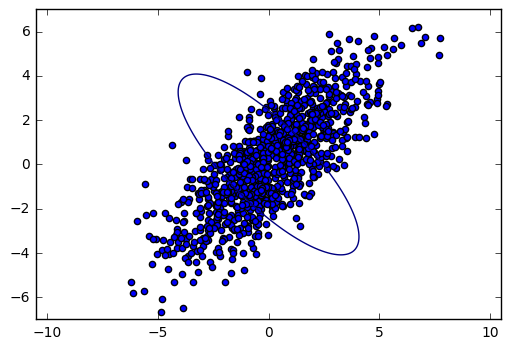

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(seed=3)

# create the (positive definite) covariance matrix and means
cov_m = [[5,4],[4,5]]
mu = [0,0]

# generate the RVs for the features
x1,x2 = np.random.multivariate_normal(mean = mu, cov = cov_m, size = 1000).T

print('Covariance Matrix is: ')
print(cov_m)

x1co = np.linspace(start = -10, stop = 10, num = 1000)
x2co = np.linspace(start = -10, stop = 10, num = 1000)
x1co,x2co = np.meshgrid(x1co,x2co)
z = cov_m[0][0]*x1co**2 + cov_m[1][1]*x2co**2 + 2*cov_m[0][1]*x2co*x1co

w,v = np.linalg.eig(np.linalg.inv(cov_m))

plt.scatter(x1,x2)
plt.contour(x1co,x2co,z,levels=[30])
plt.axis('equal')
plt.axis([-7, 7, -7, 7])
plt.show()
plt.gcf().clear()

This is interesting. We do indeed get an axis aligned ellipse, but its major/minor axes appear to be perpendicular to the data itself.

At this point we might be confused by the following train of thought:

1. According to PCA all we do now is take the eigenvectors and eigenvalues of this same ellipse we've just plotted...
2. ... but doesn't this mean that the major/minor axes are the opposite of the first and second principal components respectively?

In other words, we (i.e.: I) may have expected the ellipse to allign with our data perfectly, not perpendicularly.
(As an aside, this also means my initial hypothesis of the covariance matrix being a 'fitted' ellipse to our data is also incorrect.)

However, this internal conflict is easily resolved. Recall how we define the major and minor axes in the principal axis theorem. It was noted that eigenvector corresponding to the SMALLEST eigenvalue was actually the major axis, and the eigenvector with the LARGEST eigenvalue is actually the minor axis.

On the other hand, with PCA we have the opposite definition. We conclude that the largest eigenvalue corresponds with the first principal component, and the next largest corresponds with the second principal component.

In a sense, the way we define our major/minor axes and first/second components are the polar opposites. This explains why the 'ellipse' of our covariance matrix must lie perpendicular to our data.

As a final thought therefore, let's derive the PCA algorithm to fully conclude that we do indeed take the largest eigenvalues as being the 'major' principal components, and for my interest see if there's a way to 'fit' an ellipse to our data.

### A derivation of PCA using Lagrangians

Consider a single normalised vector $\mathbf{u_1}$ that we are trying to project our data $X$ onto (hence normalised, as we only care for direction). As we defined beforehand, we are looking to maximise the variance of the projected data. Note that in this case our new subspace rank $M$ is 1.

In order to relate this to variance (since we wish to maximise this quantity) we need to formalise the mean. We can do this by writing the mean of $X$ as $\mathbf{\bar{x}}$, which is defined as:

$$
\mathbf{\bar{x}} = \frac{1}{N}\sum_{i=1}^n\mathbf{x_i}
$$
where $\mathbf{x_i}$ is the $i$th sample of our data.

Using the dot product, we can find the projection of each point onto this vector, including the mean of our data. This is simply $\mathbf{u_1}\boldsymbol{\cdot}\mathbf{x_i}$ and $\mathbf{u_1}\boldsymbol{\cdot}\mathbf{\bar{x}}$ (since $\mathbf{u_1}$ is normalised we end up with simply $\|\mathbf{x_i}\|\cos{\theta}$).

Now that we have a measure of the projection, as well as the mean projection, we can relate this to variance as follows:

